<a href="https://colab.research.google.com/github/mizscrystal/AB-Testing/blob/main/AB_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Head of Business Performance is curious about customer purchasing behaviour and recently requested we run an A/B test across a segment of B2B partners to find out if there is opportunity to grow Revenue and Margin. 
As the Business Pricing Analyst, your task is to analyse the results of this A/B test.

Please prepare a 15 minute presentation for the Head of Business Performance.
Your presentation should, at the very least, include the following information;
• Using the data provided, outline a description of the AB test and outline what you observed to be the main difference between A and B.  
• Using the data provided, analyse and compare the results of this test by defining and using at least 3 different KPIs 
• Finally, conclude your presentation with a recommendation of next steps. 

The dataset required for this task is included in this workbook. In addition, there is a data dictionary to support you with your interpretation of the data. 

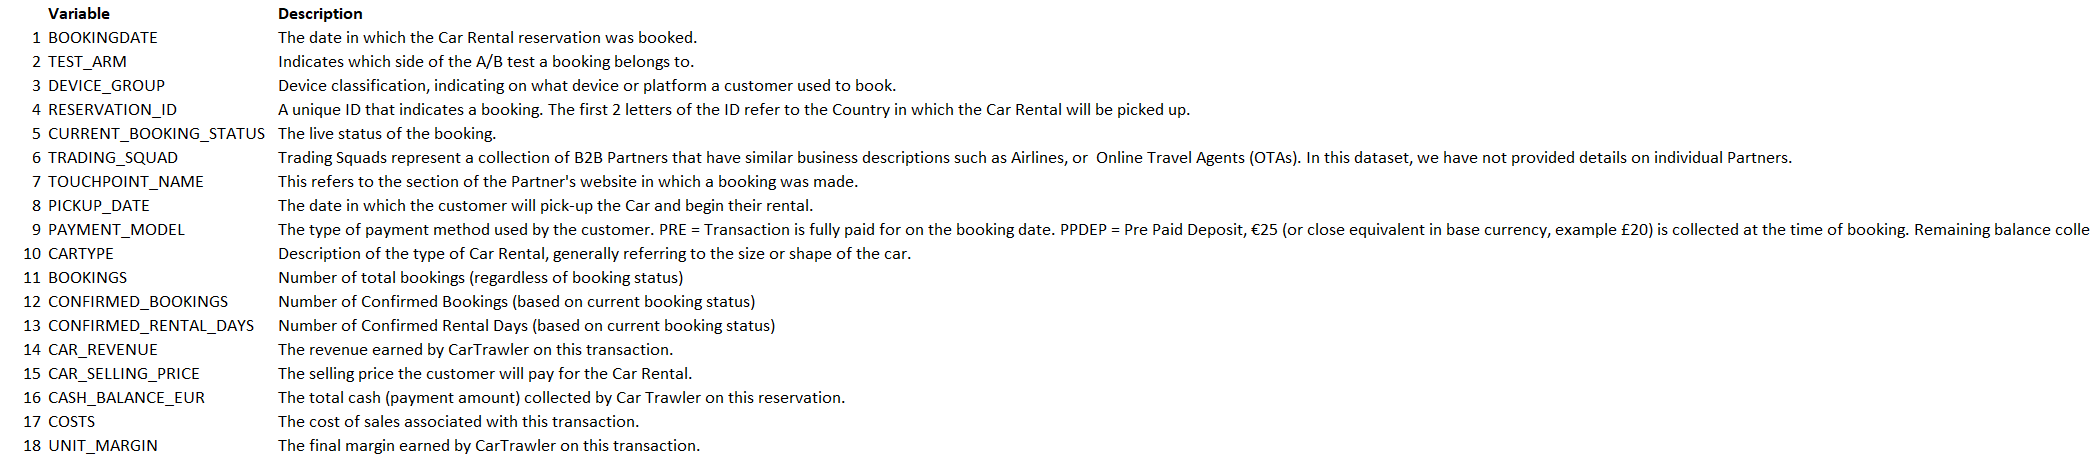

Data Manipulation and Feature Engineering

In [ ]:
#Importing the Necesarry Modules
import statistics
import pandas as pd
from scipy.stats import shapiro
import scipy.stats as stats
from scipy.stats import mannwhitneyu
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
from termcolor import colored
from datetime import timedelta

In [ ]:
# Importing our data 
from google.colab import files
dataset = files.upload()


Saving Recruitment_Assessment.xlsx to Recruitment_Assessment.xlsx


In [ ]:
# Reading the dataset from Colab Local Repository
dataset = pd.read_excel('Recruitment_Assessment.xlsx')
dataset.head()

,BOOKINGDATE,TEST_ARM,DEVICE_GROUP,RESERVATION_ID,CURRENT_BOOKING_STATUS,TRADING_SQUAD,TOUCHPOINT_NAME,PICKUP_DATE,Day rental,PAYMENT_MODEL,...,CONFIRMED_BOOKINGS,CONFIRMED_RENTAL_DAYS,CAR_REVENUE,Car Rev Average,CAR_SELLING_PRICE,Average Day Selling price,CASH_BALANCE_EUR,COSTS,UNIT_MARGIN,Margin rate
0,2022-07-08,CON.A,Mobile Web,CA617197600,Confirmed,OTAs & Car Brands,HomePage,2022-07-30,Sat,PRE,...,1,15,662.1997,44.146647,3754.33,250.288667,3682.3896,-25.7262,636.4735,16.953052
1,2022-07-05,CON.A,Desktop Web,HR615477720,Confirmed,OTAs & Car Brands,HomePage,2022-07-23,Sat,PRE,...,1,28,607.7588,21.705671,5124.16,183.005714,5124.1600,-8.5491,599.2097,11.693813
2,2022-06-01,CON.A,Desktop Web,AE807708590,Confirmed,Airlines - EMEA,Manage My Booking,2022-06-18,Sat,PRE,...,1,8,222.8471,27.855888,980.36,122.545000,976.8426,281.1123,503.9594,51.405545
3,2022-07-13,CON.A,Desktop Web,FR619405760,Confirmed,OTAs & Car Brands,HomePage,2022-08-07,Sun,PPDEP,...,1,13,481.0732,37.005631,3207.14,246.703077,23.6502,-13.2806,467.7926,14.585974
4,2022-07-18,CON.A,Desktop Web,GR621629000,Confirmed,OTAs & Car Brands,HomePage,2022-08-12,Fri,PRE,...,1,28,406.1900,14.506786,2226.19,79.506786,2226.1900,27.8727,434.0627,19.498008


Exploratory Data Analysis

In [ ]:
# Number of Unique User
dataset.nunique()

BOOKINGDATE                    55
TEST_ARM                        2
DEVICE_GROUP                    3
RESERVATION_ID               5406
CURRENT_BOOKING_STATUS          2
TRADING_SQUAD                   2
TOUCHPOINT_NAME                 4
PICKUP_DATE                    60
Day rental                      7
PAYMENT_MODEL                   2
CARTYPE                         5
BOOKINGS                        1
CONFIRMED_BOOKINGS              2
CONFIRMED_RENTAL_DAYS          41
CAR_REVENUE                  4082
Car Rev Average              4136
CAR_SELLING_PRICE            4084
Average Day Selling price    4132
CASH_BALANCE_EUR             3925
COSTS                        4183
UNIT_MARGIN                  4180
Margin rate                  4186
dtype: int64

In [ ]:
# Summary Stats
dataset.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])

,BOOKINGS,CONFIRMED_BOOKINGS,CONFIRMED_RENTAL_DAYS,CAR_REVENUE,Car Rev Average,CAR_SELLING_PRICE,Average Day Selling price,CASH_BALANCE_EUR,COSTS,UNIT_MARGIN,Margin rate
count,5406.0,5406.000000,5406.000000,5406.000000,4201.000000,4201.000000,4201.000000,5406.000000,5406.000000,5406.000000,4201.000000
mean,1.0,0.777100,6.661672,94.362798,15.760109,748.669003,95.604558,532.022579,-39.037007,55.325791,10.935793
std,0.0,0.416231,6.000003,102.601484,10.987482,568.067014,55.786647,582.629820,76.103468,60.756321,7.773837
min,1.0,0.000000,0.000000,0.000000,0.000000,15.670000,9.881250,0.000000,-813.332100,-90.479100,-18.606540
1%,1.0,0.000000,0.000000,0.000000,3.037273,105.590000,25.393750,0.000000,-325.771515,-22.353840,-3.651971
5%,1.0,0.000000,0.000000,0.000000,5.182392,177.930000,36.991429,0.000000,-180.656625,0.000000,2.118132
10%,1.0,0.000000,0.000000,0.000000,6.455000,233.330000,43.661667,0.000000,-125.211300,0.000000,4.044594
20%,1.0,0.000000,0.000000,0.000000,8.287500,316.520000,55.421429,0.000000,-78.732100,0.000000,5.175549
50%,1.0,1.000000,6.000000,70.560150,13.226312,596.340000,84.744000,393.675000,-11.445250,41.581450,9.223790
80%,1.0,1.000000,11.000000,149.020000,21.144388,1086.990000,123.837500,880.960000,0.000000,96.806300,16.368130


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5406 entries, 0 to 5405
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   BOOKINGDATE                5406 non-null   datetime64[ns]
 1   TEST_ARM                   5406 non-null   object        
 2   DEVICE_GROUP               5406 non-null   object        
 3   RESERVATION_ID             5406 non-null   object        
 4   CURRENT_BOOKING_STATUS     5406 non-null   object        
 5   TRADING_SQUAD              5406 non-null   object        
 6   TOUCHPOINT_NAME            5406 non-null   object        
 7   PICKUP_DATE                5406 non-null   datetime64[ns]
 8   Day rental                 5406 non-null   object        
 9   PAYMENT_MODEL              5406 non-null   object        
 10  CARTYPE                    5406 non-null   object        
 11  BOOKINGS                   5406 non-null   int64         
 12  CONFIR

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.isnull().sum()

BOOKINGDATE                     0
TEST_ARM                        0
DEVICE_GROUP                    0
RESERVATION_ID                  0
CURRENT_BOOKING_STATUS          0
TRADING_SQUAD                   0
TOUCHPOINT_NAME                 0
PICKUP_DATE                     0
Day rental                      0
PAYMENT_MODEL                   0
CARTYPE                         0
BOOKINGS                        0
CONFIRMED_BOOKINGS              0
CONFIRMED_RENTAL_DAYS           0
CAR_REVENUE                     0
Car Rev Average              1205
CAR_SELLING_PRICE            1205
Average Day Selling price    1205
CASH_BALANCE_EUR                0
COSTS                           0
UNIT_MARGIN                     0
Margin rate                  1205
dtype: int64

In [ ]:
#we will first check the percentage of missing values and decide the best way to handle it.
#First we examine the feature with missing values
# Calculate missing percent value from whole dataset
total_null = dataset.isnull().sum()
percent_null = (total_null/(dataset.isnull().count())) * 100
missing_data = pd.concat([total_null,percent_null], keys=['Total','Percent'],axis=1)
print(missing_data)

                           Total    Percent
BOOKINGDATE                    0   0.000000
TEST_ARM                       0   0.000000
DEVICE_GROUP                   0   0.000000
RESERVATION_ID                 0   0.000000
CURRENT_BOOKING_STATUS         0   0.000000
TRADING_SQUAD                  0   0.000000
TOUCHPOINT_NAME                0   0.000000
PICKUP_DATE                    0   0.000000
Day rental                     0   0.000000
PAYMENT_MODEL                  0   0.000000
CARTYPE                        0   0.000000
BOOKINGS                       0   0.000000
CONFIRMED_BOOKINGS             0   0.000000
CONFIRMED_RENTAL_DAYS          0   0.000000
CAR_REVENUE                    0   0.000000
Car Rev Average             1205  22.290048
CAR_SELLING_PRICE           1205  22.290048
Average Day Selling price   1205  22.290048
CASH_BALANCE_EUR               0   0.000000
COSTS                          0   0.000000
UNIT_MARGIN                    0   0.000000
Margin rate                 1205

In [ ]:
#dropping the null values
dataset = dataset.dropna()
total_null_1 = dataset.isnull().sum()
percent_null_1 = (total_null_1/(dataset.isnull().count())) * 100
missing_data_1 = pd.concat([total_null_1,percent_null_1], keys=['Total','Percent'],axis=1)
print(missing_data_1)

                           Total  Percent
BOOKINGDATE                    0      0.0
TEST_ARM                       0      0.0
DEVICE_GROUP                   0      0.0
RESERVATION_ID                 0      0.0
CURRENT_BOOKING_STATUS         0      0.0
TRADING_SQUAD                  0      0.0
TOUCHPOINT_NAME                0      0.0
PICKUP_DATE                    0      0.0
Day rental                     0      0.0
PAYMENT_MODEL                  0      0.0
CARTYPE                        0      0.0
BOOKINGS                       0      0.0
CONFIRMED_BOOKINGS             0      0.0
CONFIRMED_RENTAL_DAYS          0      0.0
CAR_REVENUE                    0      0.0
Car Rev Average                0      0.0
CAR_SELLING_PRICE              0      0.0
Average Day Selling price      0      0.0
CASH_BALANCE_EUR               0      0.0
COSTS                          0      0.0
UNIT_MARGIN                    0      0.0
Margin rate                    0      0.0


Visualisation of the dataset

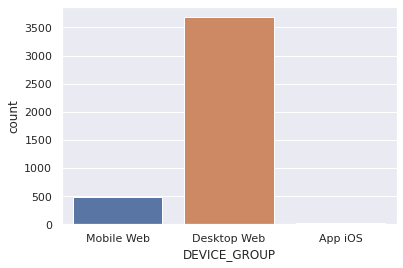

In [ ]:
sns.countplot(x="DEVICE_GROUP",data=dataset);

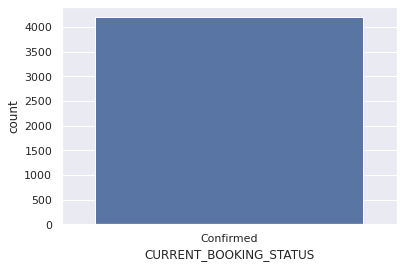

In [ ]:
sns.countplot(x="CURRENT_BOOKING_STATUS",data=dataset);

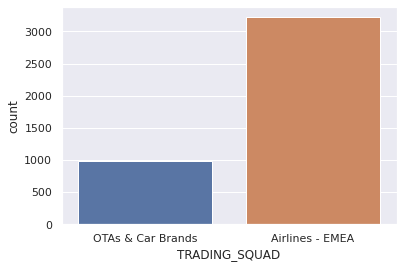

In [ ]:
sns.countplot(x="TRADING_SQUAD",data=dataset);

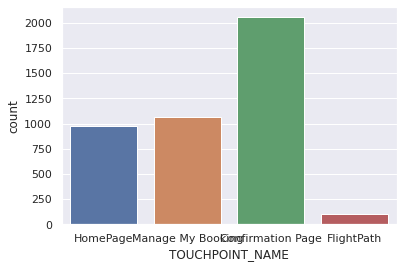

In [ ]:
sns.countplot(x="TOUCHPOINT_NAME",data=dataset);

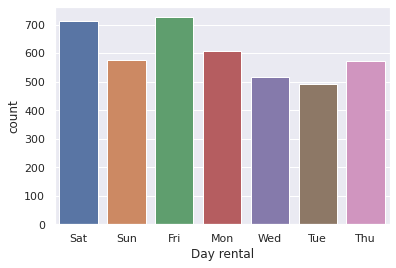

In [ ]:
sns.countplot(x="Day rental",data=dataset);

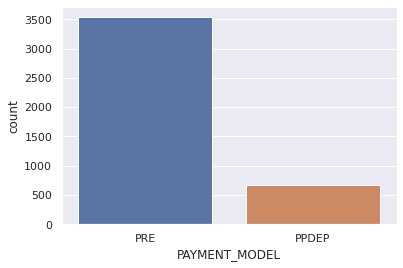

In [ ]:
sns.countplot(x="PAYMENT_MODEL",data=dataset);

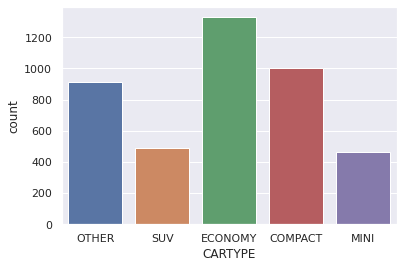

In [ ]:
sns.countplot(x="CARTYPE",data=dataset);

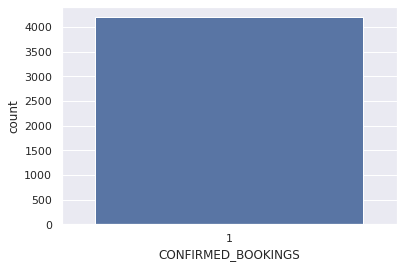

In [ ]:
sns.countplot(x="CONFIRMED_BOOKINGS",data=dataset);

In [ ]:
def univariate(dataset,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(dataset[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =dataset, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =dataset, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(dataset[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = dataset, x= col, order=dataset[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len("RESERVATION_ID"))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


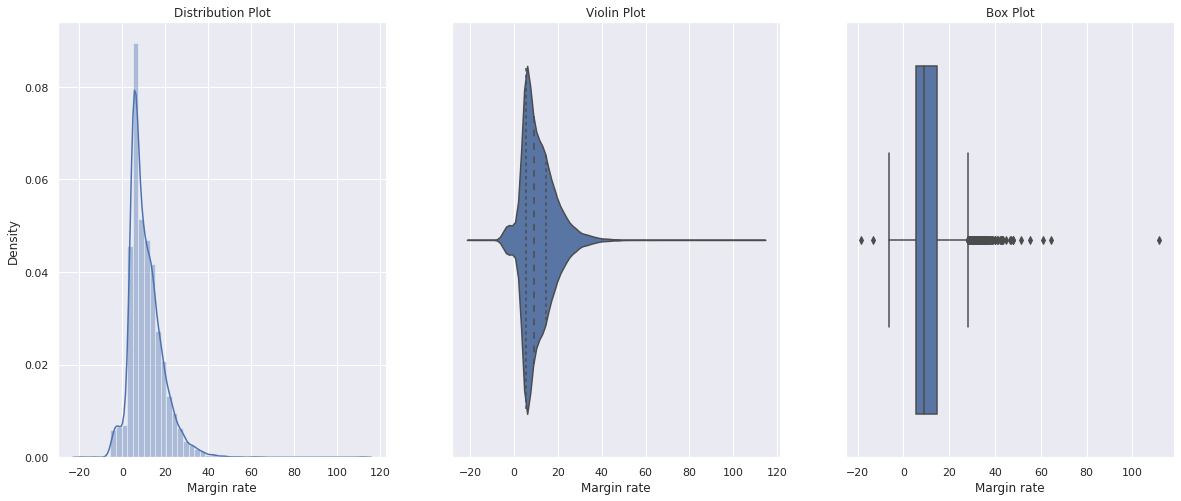

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


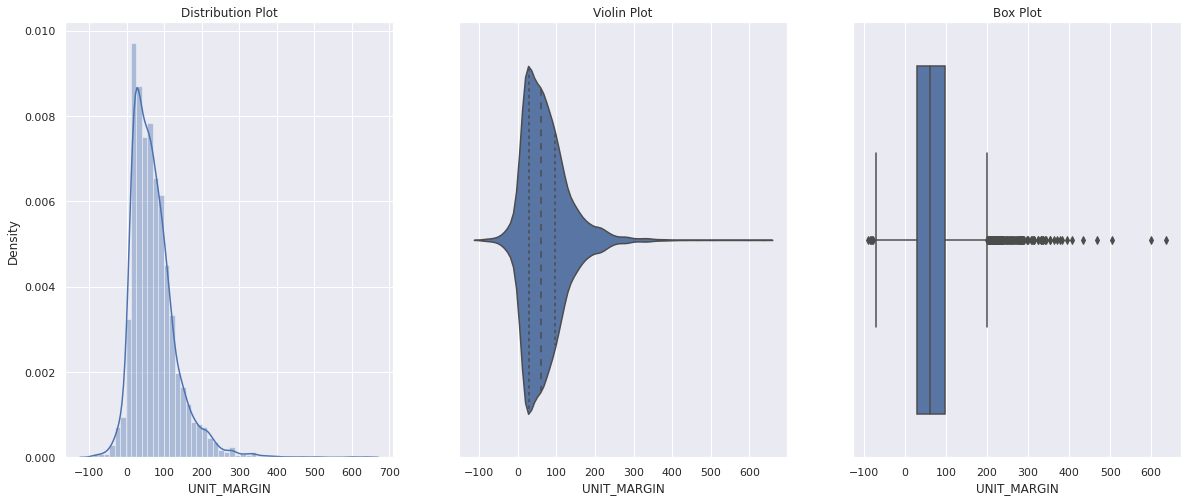

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


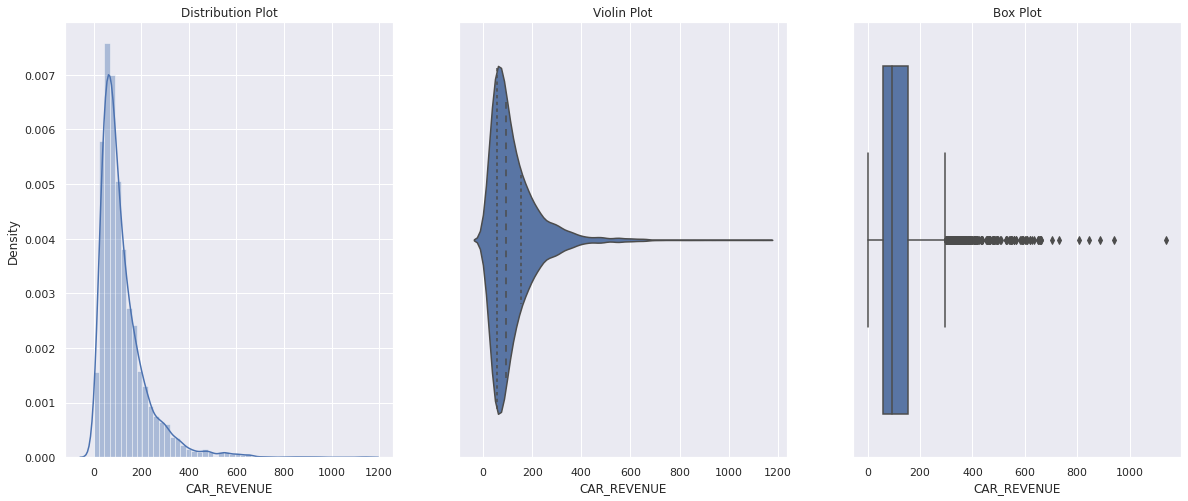

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


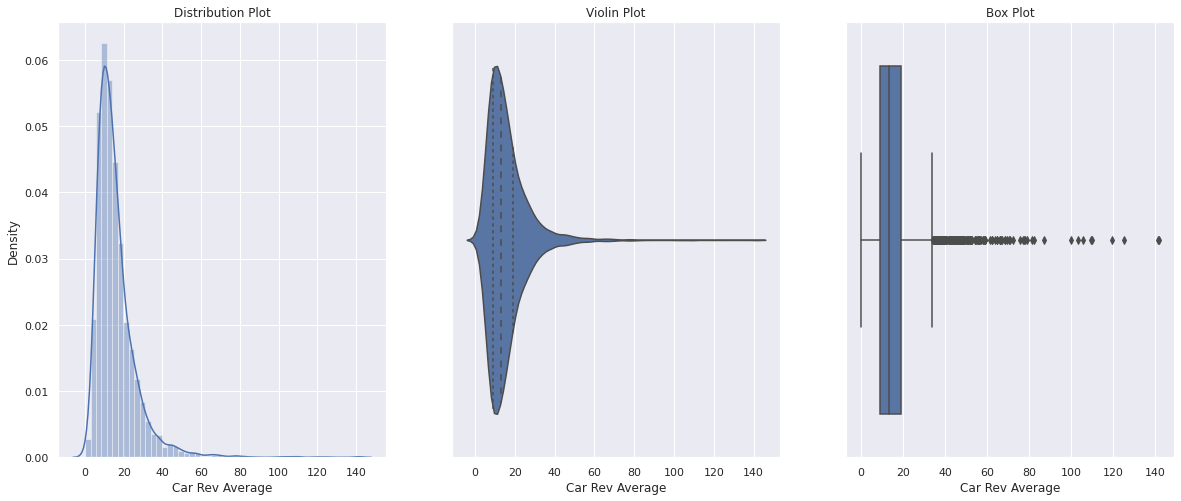

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


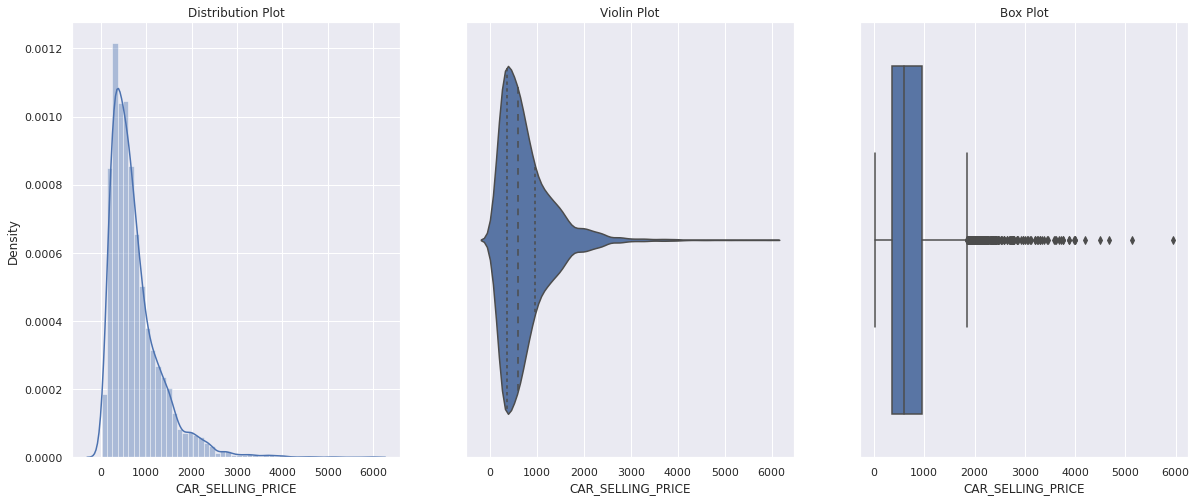

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


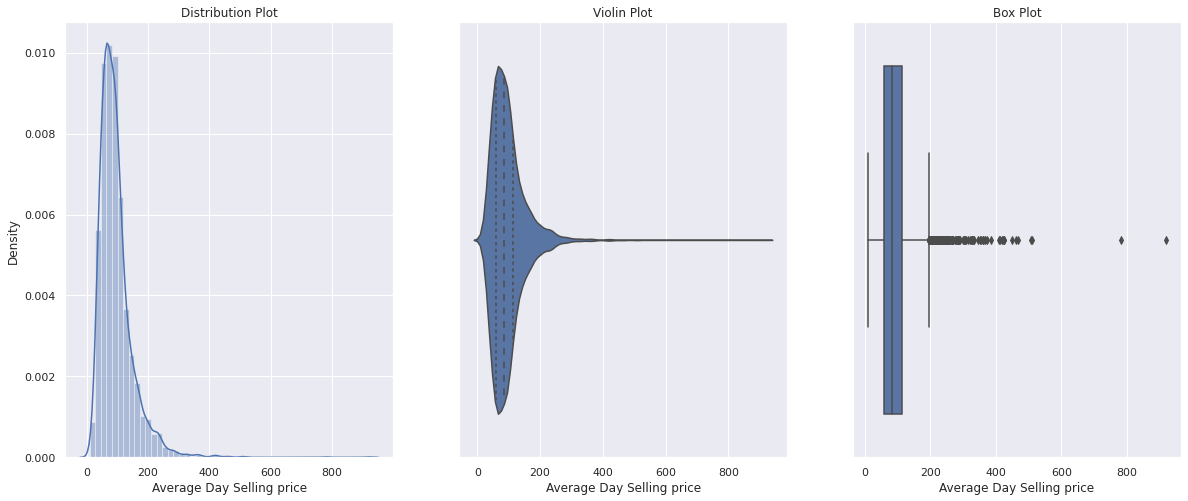

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


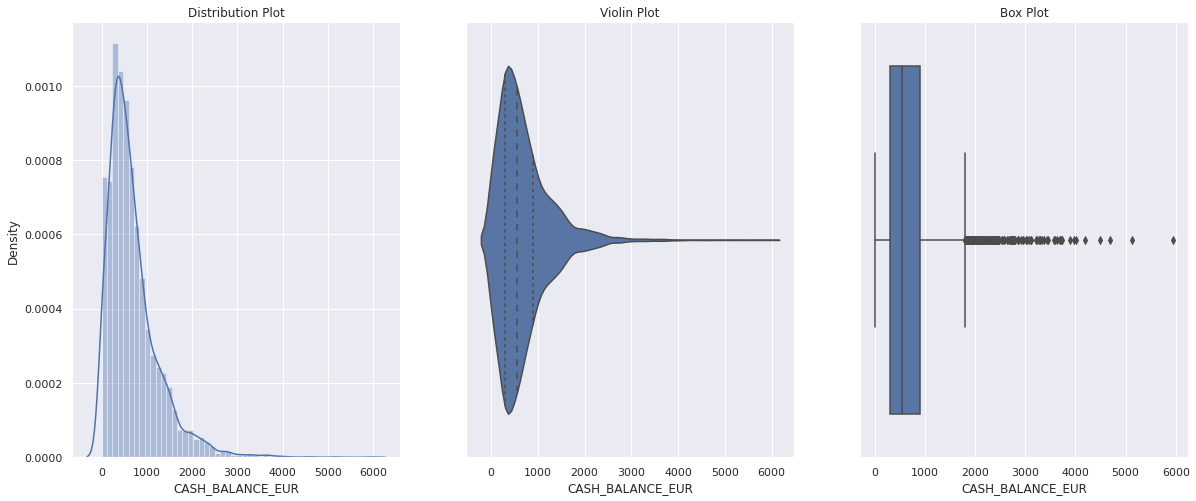

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


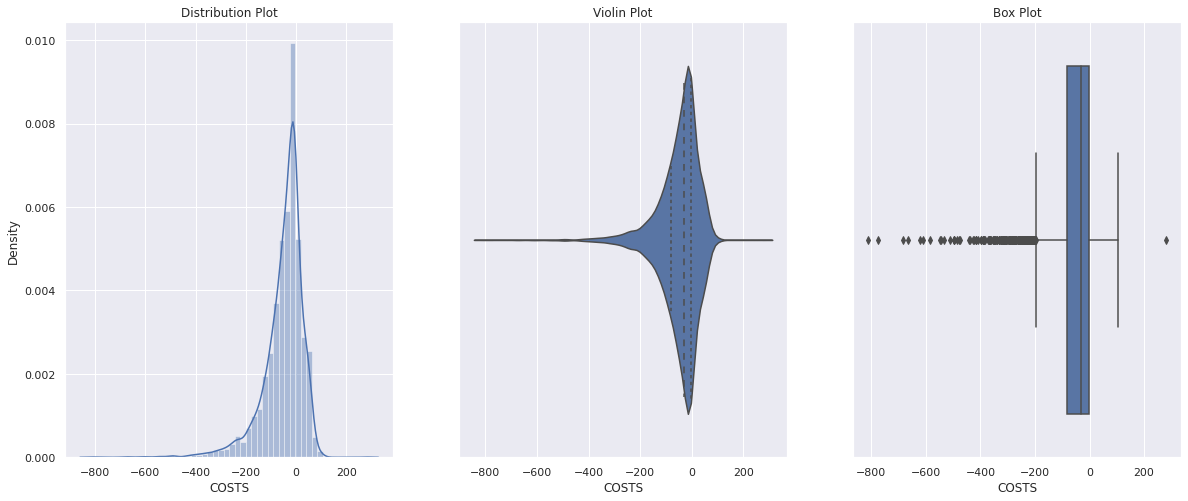

In [ ]:
univariate(dataset=dataset,col='Margin rate',vartype=0)
univariate(dataset=dataset,col='UNIT_MARGIN',vartype=0)
univariate(dataset=dataset,col='CAR_REVENUE',vartype=0)
univariate(dataset=dataset,col='Car Rev Average',vartype=0)
univariate(dataset=dataset,col='CAR_SELLING_PRICE',vartype=0)
univariate(dataset=dataset,col='Average Day Selling price',vartype=0)
univariate(dataset=dataset,col='CASH_BALANCE_EUR',vartype=0)
univariate(dataset=dataset,col='COSTS',vartype=0)

In [ ]:
def cap_data(dataset):
    for col in dataset.columns:
        print("capping the ",col)
        if (((dataset[col].dtype)=='float64') | ((dataset[col].dtype)=='int64')):
            percentiles = dataset[col].quantile([0.01,0.99]).values
            dataset[col][dataset[col] <= percentiles[0]] = percentiles[0]
            dataset[col][dataset[col] >= percentiles[1]] = percentiles[1]
        else:
            dataset[col]=dataset[col]
    return dataset

final_df=cap_data(dataset)
# In the above function , we are capping them at those percentiles. In that way , we are not losing the rows , but also we have removed the outlier effects to certain extent.

capping the  BOOKINGDATE
capping the  TEST_ARM
capping the  DEVICE_GROUP
capping the  RESERVATION_ID
capping the  CURRENT_BOOKING_STATUS
capping the  TRADING_SQUAD
capping the  TOUCHPOINT_NAME
capping the  PICKUP_DATE
capping the  Day rental
capping the  PAYMENT_MODEL
capping the  CARTYPE
capping the  BOOKINGS
capping the  CONFIRMED_BOOKINGS
capping the  CONFIRMED_RENTAL_DAYS
capping the  CAR_REVENUE
capping the  Car Rev Average
capping the  CAR_SELLING_PRICE
capping the  Average Day Selling price
capping the  CASH_BALANCE_EUR
capping the  COSTS
capping the  UNIT_MARGIN
capping the  Margin rate


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
#def delete_outliers(dataframe, name_column, quantile=[0.25, 0.75], threshold=1.5):
    #Q1, Q3 = dataframe[name_column].quantile(quantile)
    #IQR = Q3 - Q1
    #return dataframe.loc[(dataframe[name_column] >= Q1 - threshold * IQR) & (dataframe[name_column] <= Q3 + threshold * IQR)]

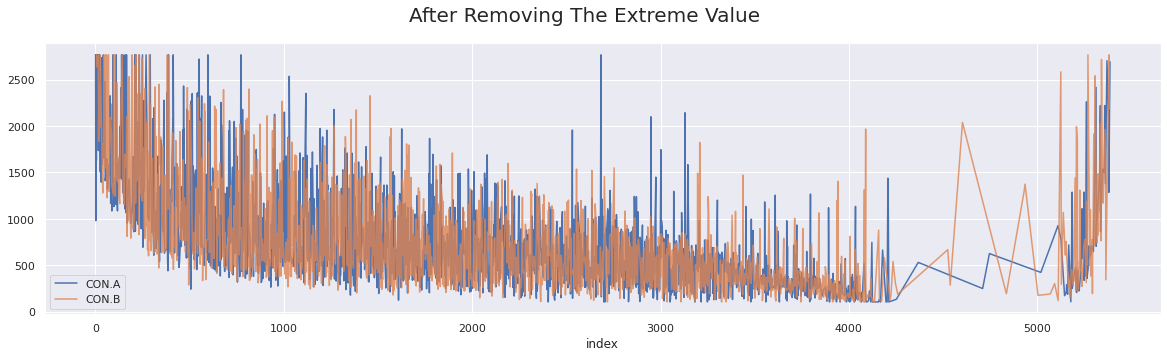

In [ ]:
#dataset[(dataset.TEST_ARM == "CON.A")].reset_index().set_index("index").CAR_REVENUE.plot(legend = True, label = "CON.A", figsize = (20,5))
#dataset[(dataset.TEST_ARM == "CON.B")].reset_index().set_index("index").CAR_REVENUE.plot(legend = True, label = "CON.B", alpha = 0.8)
dataset[(dataset.TEST_ARM == "CON.A")].reset_index().set_index("index").CAR_SELLING_PRICE.plot(legend = True, label = "CON.A", figsize = (20,5))
dataset[(dataset.TEST_ARM == "CON.B")].reset_index().set_index("index").CAR_SELLING_PRICE.plot(legend = True, label = "CON.B", alpha = 0.8)
plt.suptitle("After Removing The Extreme Value", fontsize = 20);

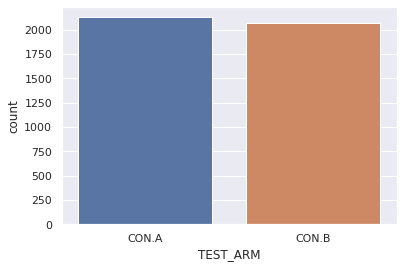

In [ ]:
# Counting the number of players in each group.
dataset.groupby("TEST_ARM")["RESERVATION_ID"].count()
sns.countplot(x="TEST_ARM",data=dataset);

In [ ]:
tmp = dataset.groupby('TEST_ARM').count()
expected_ratio = 0.5
real_ratio = tmp['RESERVATION_ID'].loc['CON.A']/(tmp['RESERVATION_ID'].loc['CON.A']+tmp['RESERVATION_ID'].loc['CON.B'])
cc = tmp['RESERVATION_ID'].loc['CON.A']
ct = tmp['RESERVATION_ID'].loc['CON.B']
p_value = 2*(1 - stats.t.cdf(abs((expected_ratio-real_ratio)/np.sqrt(expected_ratio*(1-expected_ratio)/(cc+ct))), cc+ct-1))

print('Count in Control: {}'.format(cc))
print('Count in Treatment: {}'.format(ct))
print('Expected ratio: {}'.format(expected_ratio))
print('Real ratio: {}'.format(real_ratio))
print('P-value for srm: {}'.format(p_value))

Count in Control: 2130
Count in Treatment: 2071
Expected ratio: 0.5
Real ratio: 0.507022137586289
P-value for srm: 0.36272635921973406


We choose α=0.01<0.39912886560426775, and it means no Sample Ratio Mismatch

If your results from the Chi-Squared test come back with statistically significant results, then you know that the difference in your observed sample sizes is not due to chance and that there is an underlying cause. This is your signal that you have an SRM issue that must be addressed for the test and the program.

In [ ]:
CONA = dataset[(dataset.TEST_ARM == "CON.A")]
CONB = dataset[(dataset.TEST_ARM == "CON.B")]

 A/B Testing for UNIT_MARGIN  

Summary Statistics by Groups for UNIT_MARGIN 

UNIT_MARGIN
TEST_ARM        CON.A        CON.B
count     2130.000000  2071.000000
mean        71.470348    69.940246
std         57.819184    54.932096
median      59.792950    60.519900
min        -26.773300   -26.773300
max        278.400600   278.400600 

Histogram by Groups for UNIT_MARGIN 



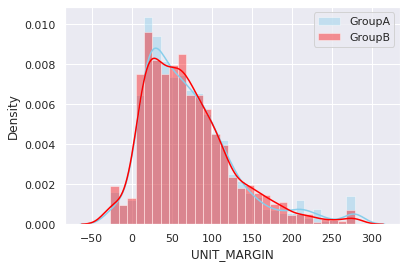

Box Plot by Groups for UNIT_MARGIN 



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


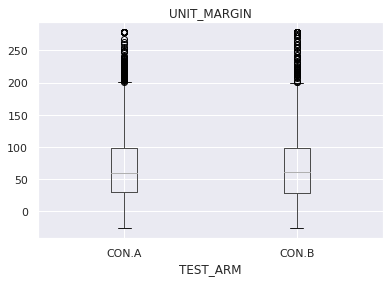

1. Step: Testing the Normality Assumption for UNIT_MARGIN 

GroupA_shaphiro_p = 0.000, GroupB_shaphiro_p = 0.000 

Shaphiro Wilk Test resulted as p < .05 for GroupA and GroupB which indicates that H0 is rejected. Accordingly distribution of UNIT_MARGIN values in GroupA and GroupB are not likely to normal distribution. 

3. Step: Alternative 2 -> Mann-Whitney U Test for UNIT_MARGIN 

u_value=2214027.000, mannw_test_p=0.831 

Mann Whitney U Test resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly there is no significant difference between GroupA and GroupB in distributions of UNIT_MARGIN values. 

 A/B Testing for COSTS  

Summary Statistics by Groups for COSTS 

COSTS
TEST_ARM        CON.A        CON.B
count     2130.000000  2071.000000
mean       -48.008352   -50.572868
std         76.072664    77.305484
median     -30.477750   -30.761600
min       -353.014700  -353.014700
max         65.906500    65.906500 

Histogram by Groups for COSTS 



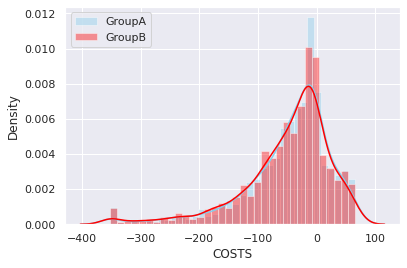

Box Plot by Groups for COSTS 



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


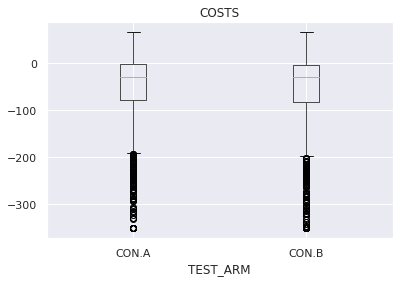

1. Step: Testing the Normality Assumption for COSTS 

GroupA_shaphiro_p = 0.000, GroupB_shaphiro_p = 0.000 

Shaphiro Wilk Test resulted as p < .05 for GroupA and GroupB which indicates that H0 is rejected. Accordingly distribution of COSTS values in GroupA and GroupB are not likely to normal distribution. 

3. Step: Alternative 2 -> Mann-Whitney U Test for COSTS 

u_value=2251282.500, mannw_test_p=0.245 

Mann Whitney U Test resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly there is no significant difference between GroupA and GroupB in distributions of COSTS values. 

 A/B Testing for CASH_BALANCE_EUR  

Summary Statistics by Groups for CASH_BALANCE_EUR 

CASH_BALANCE_EUR
TEST_ARM        CON.A        CON.B
count     2130.000000  2071.000000
mean       627.617689   729.098342
std        558.418846   520.035719
median     493.245000   584.980000
min         23.214600    23.214600
max       2720.990000  2720.990000 

Histogram by Groups for CASH_BALANCE_EUR 



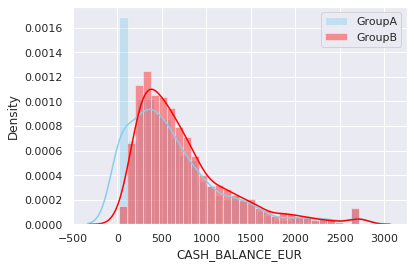

Box Plot by Groups for CASH_BALANCE_EUR 



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


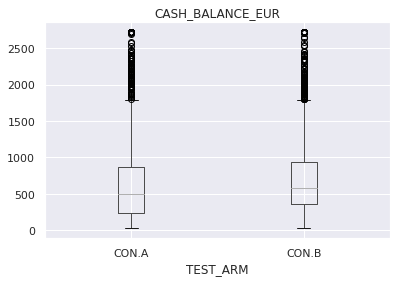

1. Step: Testing the Normality Assumption for CASH_BALANCE_EUR 

GroupA_shaphiro_p = 0.000, GroupB_shaphiro_p = 0.000 

Shaphiro Wilk Test resulted as p < .05 for GroupA and GroupB which indicates that H0 is rejected. Accordingly distribution of CASH_BALANCE_EUR values in GroupA and GroupB are not likely to normal distribution. 

3. Step: Alternative 2 -> Mann-Whitney U Test for CASH_BALANCE_EUR 

u_value=1864173.500, mannw_test_p=0.000 

Mann Whitney U Test resulted as p < .05 which indicates that H0 is rejected. Accordingly there is a significant difference between GroupA and GroupB in distributions of CASH_BALANCE_EUR values. 

Median of GroupB in CASH_BALANCE_EUR is greater than GroupA 

 A/B Testing for CAR_SELLING_PRICE  

Summary Statistics by Groups for CAR_SELLING_PRICE 

CAR_SELLING_PRICE
TEST_ARM        CON.A        CON.B
count     2130.000000  2071.000000
mean       745.786061   737.285857
std        540.575209   523.089452
median     600.875000   591.450000
min        105.

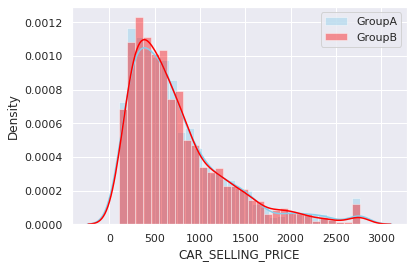

Box Plot by Groups for CAR_SELLING_PRICE 



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


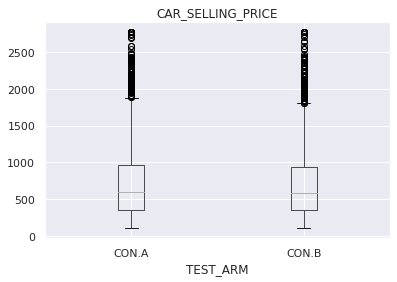

1. Step: Testing the Normality Assumption for CAR_SELLING_PRICE 

GroupA_shaphiro_p = 0.000, GroupB_shaphiro_p = 0.000 

Shaphiro Wilk Test resulted as p < .05 for GroupA and GroupB which indicates that H0 is rejected. Accordingly distribution of CAR_SELLING_PRICE values in GroupA and GroupB are not likely to normal distribution. 

3. Step: Alternative 2 -> Mann-Whitney U Test for CAR_SELLING_PRICE 

u_value=2212773.500, mannw_test_p=0.855 

Mann Whitney U Test resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly there is no significant difference between GroupA and GroupB in distributions of CAR_SELLING_PRICE values. 

 A/B Testing for CAR_REVENUE  

Summary Statistics by Groups for CAR_REVENUE 

CAR_REVENUE
TEST_ARM        CON.A        CON.B
count     2130.000000  2071.000000
mean       120.155131   120.878276
std         96.184053    95.442513
median      90.770150    91.860000
min         15.265800    15.265800
max        541.099400   541.099400 

Histogram 

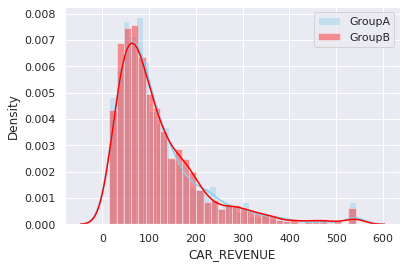

Box Plot by Groups for CAR_REVENUE 



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


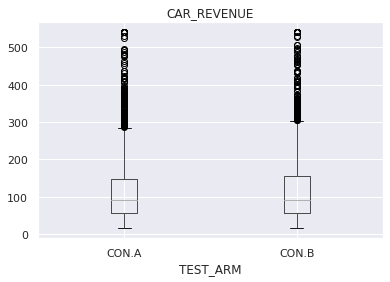

1. Step: Testing the Normality Assumption for CAR_REVENUE 

GroupA_shaphiro_p = 0.000, GroupB_shaphiro_p = 0.000 

Shaphiro Wilk Test resulted as p < .05 for GroupA and GroupB which indicates that H0 is rejected. Accordingly distribution of CAR_REVENUE values in GroupA and GroupB are not likely to normal distribution. 

3. Step: Alternative 2 -> Mann-Whitney U Test for CAR_REVENUE 

u_value=2189426.000, mannw_test_p=0.680 

Mann Whitney U Test resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly there is no significant difference between GroupA and GroupB in distributions of CAR_REVENUE values. 

 A/B Testing for CONFIRMED_RENTAL_DAYS  

Summary Statistics by Groups for CONFIRMED_RENTAL_DAYS 

CONFIRMED_RENTAL_DAYS
TEST_ARM        CON.A        CON.B
count     2130.000000  2071.000000
mean         8.553052     8.483824
std          5.362330     5.066572
median       7.000000     8.000000
min          1.000000     1.000000
max         27.000000    27.000000 

Hist

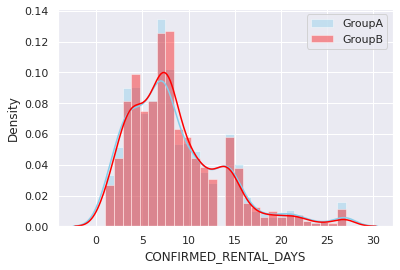

Box Plot by Groups for CONFIRMED_RENTAL_DAYS 



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


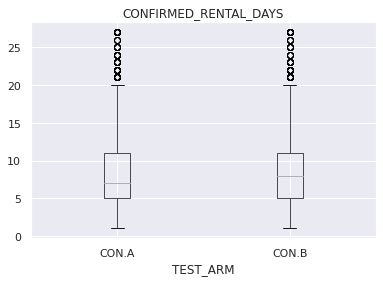

1. Step: Testing the Normality Assumption for CONFIRMED_RENTAL_DAYS 

GroupA_shaphiro_p = 0.000, GroupB_shaphiro_p = 0.000 

Shaphiro Wilk Test resulted as p < .05 for GroupA and GroupB which indicates that H0 is rejected. Accordingly distribution of CONFIRMED_RENTAL_DAYS values in GroupA and GroupB are not likely to normal distribution. 

3. Step: Alternative 2 -> Mann-Whitney U Test for CONFIRMED_RENTAL_DAYS 

u_value=2190476.500, mannw_test_p=0.699 

Mann Whitney U Test resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly there is no significant difference between GroupA and GroupB in distributions of CONFIRMED_RENTAL_DAYS values. 



In [ ]:
variables = ["UNIT_MARGIN","COSTS","CASH_BALANCE_EUR","CAR_SELLING_PRICE","CAR_REVENUE","CONFIRMED_RENTAL_DAYS"]

for x in variables:
    print(colored(" A/B Testing for ","cyan", attrs=["bold",'reverse', 'blink'])+colored(x+" ","cyan", attrs=["bold",'reverse', 'blink']),"\n")
    print(colored("Summary Statistics by Groups for "+x,"cyan", attrs=["bold"]),"\n")
    result3 = dataset.groupby("TEST_ARM")[x].aggregate(["count","mean","std","median","min",max])
    result4 = result3.transpose()
    print(x)
    print(result4,"\n")
    print(colored("Histogram by Groups for "+x,"cyan", attrs=["bold"]),"\n")
    #sns.displot(Data, x=x, hue="Group", element="step", kde=True)
    #plt.show()
    sns.distplot( CONA[x] , color="skyblue", label="GroupA")
    sns.distplot( CONB[x] , color="red", label="GroupB")
    plt.legend()
    plt.show()

    def normald():
              
        dataset.boxplot(column=[x], by="TEST_ARM",return_type=None)
        plt.suptitle("")
        print(colored("Box Plot by Groups for "+x,"cyan", attrs=["bold"]),"\n")
        plt.show()
        
        print(colored("1. Step: Testing the Normality Assumption for "+x,"cyan", attrs=["bold"]),"\n")
        GroupA_shaphiro_w, GroupA_shaphiro_p = shapiro(CONA[x])
        GroupB_shaphiro_w, GroupB_shaphiro_p = shapiro(CONB[x])
        print("GroupA_shaphiro_p = %.3f, GroupB_shaphiro_p = %.3f" % (GroupA_shaphiro_p, GroupB_shaphiro_p),"\n")
    
        if GroupA_shaphiro_p > 0.05 and GroupB_shaphiro_p > 0.05: 
            print("Shaphiro Wilk Test resulted as p > .05 for GroupA and GroupB which indicates that H0 can NOT be rejected. " 
                  "Accordingly distribution of "+x+" values in"+" GroupA and GroupB are likely to normal distribution.","\n")
            return 1
        elif GroupA_shaphiro_p < 0.05 and GroupB_shaphiro_p < 0.05:
            print("Shaphiro Wilk Test resulted as p < .05 for GroupA and GroupB which indicates that H0 is rejected. " 
                  "Accordingly distribution of "+x+" values in"+" GroupA and GroupB are not likely to normal distribution.","\n")
            return 2
        elif GroupA_shaphiro_p > 0.05 and GroupB_shaphiro_p < 0.05:
            print("Pay Attention!: Shaphiro Wilk Test resulted as p > .05 for GroupA while p < .05 for GroupB which indicates that H0 is rejected for GroupB. " 
                  "Accordingly you can check if the "+x+" values in"+" GroupB contain outlier or not","\n")
            return 3
        else :
            print("Pay Attention!: Shaphiro Wilk Test resulted as p > .05 for GroupB while p < .05 for GroupA which indicates that H0 is rejected for GroupA. " 
                "Accordingly you can check if the "+x+" values in"+" GroupA contain outlier or not","\n")
            return 4

    result = normald()
    if result == 1:
        
            print(colored("2. Step: Testing the Homogeneity Assumption for "+x,"cyan", attrs=["bold"]),"\n")
            levene_F, levene_p = stats.levene(CONA[x], CONB[x])
            print("levene_F = %.3f, levene_p = %.3f" % (levene_F, levene_p),"\n")       
            if levene_p > 0.05:
                print("Levene's Test for Homogeneity resulted as p > .05 which indicates that H0 can NOT be rejected."
                      " Accordingly variances of GroupA and GroupB are equal.","\n")
                print(colored("3. Step: Alternative 1 -> Independent Samples t Test for "+x,"cyan", attrs=["bold"]),"\n")
                t_value, t_test_p = stats.ttest_ind(CONA[x], CONB[x], equal_var=True)
                print("t_value = %.3f, t_test_p = %.3f" % (t_value, t_test_p),"\n")
                if t_test_p > 0.05:
                    print("Independent Samples t Test resulted as p > .05 which indicates that H0 can NOT be rejected."
                          " Accordingly there is no significant difference between GroupA and GroupB in "+x+" values.","\n")
                else: 
                    print("Independent Samples t Test resulted as p < .05 which indicates that H0 is rejected."
                          " Accordingly there is a significant difference between GroupA and GroupB in "+x+" values.","\n")
                    if statistics.mean(CONA["Earning"]) > statistics.mean(CONB["Earning"]):
                        print("Mean of GroupA in "+x+" is greater than GroupB","\n")
                    else:
                        print("Mean of GroupB in "+x+" is greater than GroupA","\n")
            else : 
                print("Levene's Test for Homogeneity resulted as p < .05 which indicates that H0 is rejected."
                      " Accordingly variances of GroupA and GroupB are not equal.","\n")
                print(colored("3. Step: Alternative 1 -> Independent Samples t Test for "+x,"cyan", attrs=["bold"]),"\n")
                t_value, t_test_p = stats.ttest_ind(CONA[x], CONB[x], equal_var=False)
                print('t_value = %.3f, t_test_p = %.3f' % (t_value, t_test_p),"\n")
                if t_test_p > 0.05:
                    print("Independent Samples t Test resulted as p > .05 which indicates that H0 can NOT be rejected."
                          " Accordingly there is no significant difference between GroupA and GroupB in "+x+" values.","\n")
                else: 
                    print("Independent Samples t Test resulted as p < .05 which indicates that H0 is rejected."
                          " Accordingly there is a significant difference between GroupA and GroupB in "+x+" values.","\n")
                    if statistics.mean(CONA[x]) > statistics.mean(CONB[x]):
                        print("Mean of GroupA in "+x+" is greater than GroupB","\n")
                    else:
                        print("Mean of GroupB in "+x+" is greater than GroupA","\n")
                    
                    
    elif result == 2 or result == 3 or result == 4:
        
            print(colored("3. Step: Alternative 2 -> Mann-Whitney U Test for "+x,"cyan", attrs=["bold"]),"\n")
            u_value, mannw_test_p = mannwhitneyu(CONA[x], CONB[x])
            print('u_value=%.3f, mannw_test_p=%.3f' % (u_value, mannw_test_p),"\n")
            if mannw_test_p > 0.05:
                print("Mann Whitney U Test resulted as p > .05 which indicates that H0 can NOT be rejected."
                      " Accordingly there is no significant difference between GroupA and GroupB in distributions of "+x+" values.","\n")
            else: 
                print("Mann Whitney U Test resulted as p < .05 which indicates that H0 is rejected."
                      " Accordingly there is a significant difference between GroupA and GroupB in distributions of "+x+" values.","\n")
                if statistics.median(CONA["CAR_REVENUE"]) > statistics.median(CONB["CAR_REVENUE"]):
                    print("Median of GroupA in "+x+" is greater than GroupB","\n")
                else:
                    print("Median of GroupB in "+x+" is greater than GroupA","\n")
    else :
            print("Something is wrong. Check your data!")

In [ ]:
#Feature Engineering: Margin Rate
#CONA["Margin rate"] = CONA["UNIT_MARGIN"]/CONA["CAR_SELLING_PRICE"]*100
#CONB["Margin rate"] = CONB["UNIT_MARGIN"]/CONB["CAR_SELLING_PRICE"]*100

#Feature Engineering: Average selling price per day
#CONA["Average Day Selling price"] = CONA["CAR_SELLING_PRICE"]/CONA["CONFIRMED_RENTAL_DAYS"]
#CONB["Average Day Selling price"] = CONB["CAR_SELLING_PRICE"]/CONB["CONFIRMED_RENTAL_DAYS"]

#Feature Engineering: Earning per Purchase
#CONA["Car Rev Average"] = CONA["CAR_REVENUE"]/CONA["CONFIRMED_RENTAL_DAYS"]
#CONB["Car Rev Average"] = CONB["CAR_REVENUE"]/CONB["CONFIRMED_RENTAL_DAYS"]

#Data Manipulation: Indication of Groups in A New Variable
#DataGroupA["Group"] = "GroupA"
#DataGroupB["Group"] = "GroupB"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

 A/B Testing for Margin rate  

Summary Statistics by Groups for Margin rate 

Margin rate
TEST_ARM        CON.A        CON.B
count     2130.000000  2071.000000
mean        10.923984    10.809866
std          7.373910     7.290122
median       9.237083     9.186772
min         -3.651971    -3.651971
max         35.017908    35.017908 

Histogram by Groups for Margin rate 



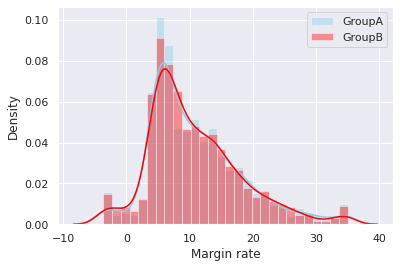

Box Plot by Groups for Margin rate 



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


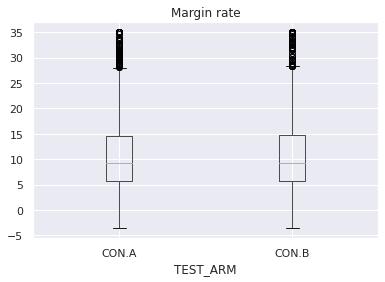

1. Step: Testing the Normality Assumption for Margin rate 

GroupA_shaphiro_p = 0.000, GroupB_shaphiro_p = 0.000 

Shaphiro Wilk Test resulted as p < .05 for GroupA and GroupB which indicates that H0 is rejected. Accordingly distribution of Margin rate values in GroupA and GroupB are not likely to normal distribution. 

3. Step: Alternative 2 -> Mann-Whitney U Test for Margin rate 

u_value=2211118.000, mannw_test_p=0.889 

Mann Whitney U Test resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly there is no significant difference between GroupA and GroupB in distributions of Margin rate values. 

 A/B Testing for UNIT_MARGIN  

Summary Statistics by Groups for UNIT_MARGIN 

UNIT_MARGIN
TEST_ARM        CON.A        CON.B
count     2130.000000  2071.000000
mean        71.470348    69.940246
std         57.819184    54.932096
median      59.792950    60.519900
min        -26.773300   -26.773300
max        278.400600   278.400600 

Histogram by Groups for UNIT_MARGI

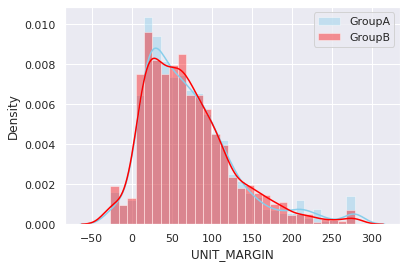

Box Plot by Groups for UNIT_MARGIN 



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


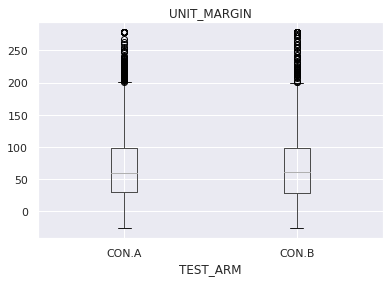

1. Step: Testing the Normality Assumption for UNIT_MARGIN 

GroupA_shaphiro_p = 0.000, GroupB_shaphiro_p = 0.000 

Shaphiro Wilk Test resulted as p < .05 for GroupA and GroupB which indicates that H0 is rejected. Accordingly distribution of UNIT_MARGIN values in GroupA and GroupB are not likely to normal distribution. 

3. Step: Alternative 2 -> Mann-Whitney U Test for UNIT_MARGIN 

u_value=2214027.000, mannw_test_p=0.831 

Mann Whitney U Test resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly there is no significant difference between GroupA and GroupB in distributions of UNIT_MARGIN values. 

 A/B Testing for Average Day Selling price  

Summary Statistics by Groups for Average Day Selling price 

Average Day Selling price
TEST_ARM        CON.A        CON.B
count     2130.000000  2071.000000
mean        95.343882    93.963383
std         50.628571    49.045584
median      85.220714    84.240000
min         25.393750    25.393750
max        284.691250   284.6

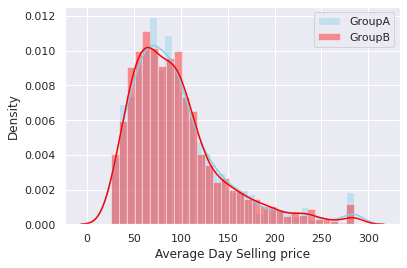

Box Plot by Groups for Average Day Selling price 



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


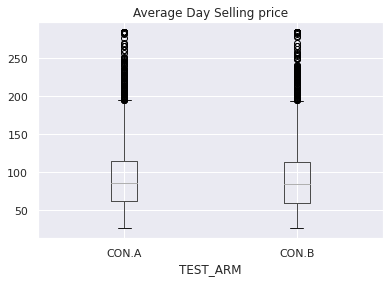

1. Step: Testing the Normality Assumption for Average Day Selling price 

GroupA_shaphiro_p = 0.000, GroupB_shaphiro_p = 0.000 

Shaphiro Wilk Test resulted as p < .05 for GroupA and GroupB which indicates that H0 is rejected. Accordingly distribution of Average Day Selling price values in GroupA and GroupB are not likely to normal distribution. 

3. Step: Alternative 2 -> Mann-Whitney U Test for Average Day Selling price 

u_value=2232507.000, mannw_test_p=0.494 

Mann Whitney U Test resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly there is no significant difference between GroupA and GroupB in distributions of Average Day Selling price values. 

 A/B Testing for Car Rev Average  

Summary Statistics by Groups for Car Rev Average 

Car Rev Average
TEST_ARM        CON.A        CON.B
count     2130.000000  2071.000000
mean        15.579520    15.520528
std          9.720940     9.511527
median      13.256517    13.190825
min          3.037273     3.037273
max

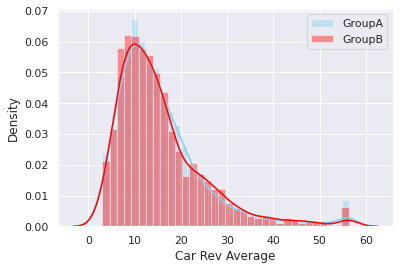

Box Plot by Groups for Car Rev Average 



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


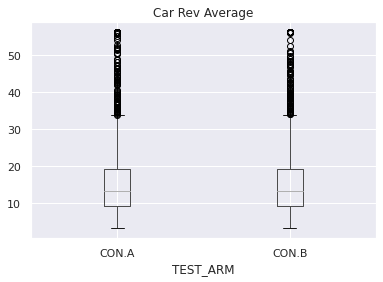

1. Step: Testing the Normality Assumption for Car Rev Average 

GroupA_shaphiro_p = 0.000, GroupB_shaphiro_p = 0.000 

Shaphiro Wilk Test resulted as p < .05 for GroupA and GroupB which indicates that H0 is rejected. Accordingly distribution of Car Rev Average values in GroupA and GroupB are not likely to normal distribution. 

3. Step: Alternative 2 -> Mann-Whitney U Test for Car Rev Average 

u_value=2215660.500, mannw_test_p=0.798 

Mann Whitney U Test resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly there is no significant difference between GroupA and GroupB in distributions of Car Rev Average values. 



In [ ]:
variables = ["Margin rate","UNIT_MARGIN","Average Day Selling price","Car Rev Average"]

for x in variables:
    print(colored(" A/B Testing for ","cyan", attrs=["bold",'reverse', 'blink'])+colored(x+" ","cyan", attrs=["bold",'reverse', 'blink']),"\n")
    print(colored("Summary Statistics by Groups for "+x,"cyan", attrs=["bold"]),"\n")
    result3 = dataset.groupby("TEST_ARM")[x].aggregate(["count","mean","std","median","min",max])
    result4 = result3.transpose()
    print(x)
    print(result4,"\n")
    print(colored("Histogram by Groups for "+x,"cyan", attrs=["bold"]),"\n")
    #sns.displot(Data, x=x, hue="Group", element="step", kde=True)
    #plt.show()
    sns.distplot( CONA[x] , color="skyblue", label="GroupA")
    sns.distplot( CONB[x] , color="red", label="GroupB")
    plt.legend()
    plt.show()

    def normald():
              
        dataset.boxplot(column=[x], by="TEST_ARM",return_type=None)
        plt.suptitle("")
        print(colored("Box Plot by Groups for "+x,"cyan", attrs=["bold"]),"\n")
        plt.show()
        
        print(colored("1. Step: Testing the Normality Assumption for "+x,"cyan", attrs=["bold"]),"\n")
        GroupA_shaphiro_w, GroupA_shaphiro_p = shapiro(CONA[x])
        GroupB_shaphiro_w, GroupB_shaphiro_p = shapiro(CONB[x])
        print("GroupA_shaphiro_p = %.3f, GroupB_shaphiro_p = %.3f" % (GroupA_shaphiro_p, GroupB_shaphiro_p),"\n")
    
        if GroupA_shaphiro_p > 0.05 and GroupB_shaphiro_p > 0.05: 
            print("Shaphiro Wilk Test resulted as p > .05 for GroupA and GroupB which indicates that H0 can NOT be rejected. " 
                  "Accordingly distribution of "+x+" values in"+" GroupA and GroupB are likely to normal distribution.","\n")
            return 1
        elif GroupA_shaphiro_p < 0.05 and GroupB_shaphiro_p < 0.05:
            print("Shaphiro Wilk Test resulted as p < .05 for GroupA and GroupB which indicates that H0 is rejected. " 
                  "Accordingly distribution of "+x+" values in"+" GroupA and GroupB are not likely to normal distribution.","\n")
            return 2
        elif GroupA_shaphiro_p > 0.05 and GroupB_shaphiro_p < 0.05:
            print("Pay Attention!: Shaphiro Wilk Test resulted as p > .05 for GroupA while p < .05 for GroupB which indicates that H0 is rejected for GroupB. " 
                  "Accordingly you can check if the "+x+" values in"+" GroupB contain outlier or not","\n")
            return 3
        else :
            print("Pay Attention!: Shaphiro Wilk Test resulted as p > .05 for GroupB while p < .05 for GroupA which indicates that H0 is rejected for GroupA. " 
                "Accordingly you can check if the "+x+" values in"+" GroupA contain outlier or not","\n")
            return 4

    result = normald()
    if result == 1:
        
            print(colored("2. Step: Testing the Homogeneity Assumption for "+x,"cyan", attrs=["bold"]),"\n")
            levene_F, levene_p = stats.levene(CONA[x], CONB[x])
            print("levene_F = %.3f, levene_p = %.3f" % (levene_F, levene_p),"\n")       
            if levene_p > 0.05:
                print("Levene's Test for Homogeneity resulted as p > .05 which indicates that H0 can NOT be rejected."
                      " Accordingly variances of GroupA and GroupB are equal.","\n")
                print(colored("3. Step: Alternative 1 -> Independent Samples t Test for "+x,"cyan", attrs=["bold"]),"\n")
                t_value, t_test_p = stats.ttest_ind(CONA[x], CONB[x], equal_var=True)
                print("t_value = %.3f, t_test_p = %.3f" % (t_value, t_test_p),"\n")
                if t_test_p > 0.05:
                    print("Independent Samples t Test resulted as p > .05 which indicates that H0 can NOT be rejected."
                          " Accordingly there is no significant difference between GroupA and GroupB in "+x+" values.","\n")
                else: 
                    print("Independent Samples t Test resulted as p < .05 which indicates that H0 is rejected."
                          " Accordingly there is a significant difference between GroupA and GroupB in "+x+" values.","\n")
                    if statistics.mean(CONA["Earning"]) > statistics.mean(CONB["Earning"]):
                        print("Mean of GroupA in "+x+" is greater than GroupB","\n")
                    else:
                        print("Mean of GroupB in "+x+" is greater than GroupA","\n")
            else : 
                print("Levene's Test for Homogeneity resulted as p < .05 which indicates that H0 is rejected."
                      " Accordingly variances of GroupA and GroupB are not equal.","\n")
                print(colored("3. Step: Alternative 1 -> Independent Samples t Test for "+x,"cyan", attrs=["bold"]),"\n")
                t_value, t_test_p = stats.ttest_ind(CONA[x], CONB[x], equal_var=False)
                print('t_value = %.3f, t_test_p = %.3f' % (t_value, t_test_p),"\n")
                if t_test_p > 0.05:
                    print("Independent Samples t Test resulted as p > .05 which indicates that H0 can NOT be rejected."
                          " Accordingly there is no significant difference between GroupA and GroupB in "+x+" values.","\n")
                else: 
                    print("Independent Samples t Test resulted as p < .05 which indicates that H0 is rejected."
                          " Accordingly there is a significant difference between GroupA and GroupB in "+x+" values.","\n")
                    if statistics.mean(CONA[x]) > statistics.mean(CONB[x]):
                        print("Mean of GroupA in "+x+" is greater than GroupB","\n")
                    else:
                        print("Mean of GroupB in "+x+" is greater than GroupA","\n")
                    
                    
    elif result == 2 or result == 3 or result == 4:
        
            print(colored("3. Step: Alternative 2 -> Mann-Whitney U Test for "+x,"cyan", attrs=["bold"]),"\n")
            u_value, mannw_test_p = mannwhitneyu(CONA[x], CONB[x])
            print('u_value=%.3f, mannw_test_p=%.3f' % (u_value, mannw_test_p),"\n")
            if mannw_test_p > 0.05:
                print("Mann Whitney U Test resulted as p > .05 which indicates that H0 can NOT be rejected."
                      " Accordingly there is no significant difference between GroupA and GroupB in distributions of "+x+" values.","\n")
            else: 
                print("Mann Whitney U Test resulted as p < .05 which indicates that H0 is rejected."
                      " Accordingly there is a significant difference between GroupA and GroupB in distributions of "+x+" values.","\n")
                if statistics.median(CONA["CAR_REVENUE"]) > statistics.median(CONB["CAR_REVENUE"]):
                    print("Median of GroupA in "+x+" is greater than GroupB","\n")
                else:
                    print("Median of GroupB in "+x+" is greater than GroupA","\n")
    else :
            print("Something is wrong. Check your data!")

 A/B Testing for Average Day Selling price  

Summary Statistics by Groups for Average Day Selling price 

Average Day Selling price
TEST_ARM        CON.A        CON.B
count     2130.000000  2071.000000
mean        95.343882    93.963383
std         50.628571    49.045584
median      85.220714    84.240000
min         25.393750    25.393750
max        284.691250   284.691250 

Histogram by Groups for Average Day Selling price 



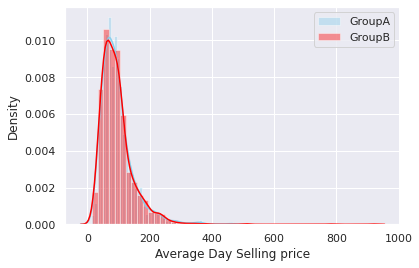

Box Plot by Groups for Average Day Selling price 



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


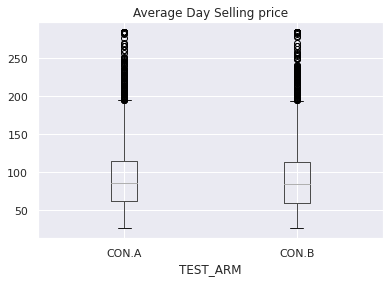

1. Step: Testing the Normality Assumption for Average Day Selling price 

GroupA_shaphiro_p = 1.000, GroupB_shaphiro_p = 1.000 

Shaphiro Wilk Test resulted as p > .05 for GroupA and GroupB which indicates that H0 can NOT be rejected. Accordingly distribution of Average Day Selling price values in GroupA and GroupB are likely to normal distribution. 

2. Step: Testing the Homogeneity Assumption for Average Day Selling price 

levene_F = nan, levene_p = nan 

Levene's Test for Homogeneity resulted as p < .05 which indicates that H0 is rejected. Accordingly variances of GroupA and GroupB are not equal. 

3. Step: Alternative 1 -> Independent Samples t Test for Average Day Selling price 

t_value = nan, t_test_p = nan 

Independent Samples t Test resulted as p < .05 which indicates that H0 is rejected. Accordingly there is a significant difference between GroupA and GroupB in Average Day Selling price values. 

Mean of GroupB in Average Day Selling price is greater than GroupA 



In [ ]:
variables = ["Average Day Selling price"]

for x in variables:
    print(colored(" A/B Testing for ","cyan", attrs=["bold",'reverse', 'blink'])+colored(x+" ","cyan", attrs=["bold",'reverse', 'blink']),"\n")
    print(colored("Summary Statistics by Groups for "+x,"cyan", attrs=["bold"]),"\n")
    result3 = dataset.groupby("TEST_ARM")[x].aggregate(["count","mean","std","median","min",max])
    result4 = result3.transpose()
    print(x)
    print(result4,"\n")
    print(colored("Histogram by Groups for "+x,"cyan", attrs=["bold"]),"\n")
    #sns.displot(Data, x=x, hue="Group", element="step", kde=True)
    #plt.show()
    sns.distplot( CONA[x] , color="skyblue", label="GroupA")
    sns.distplot( CONB[x] , color="red", label="GroupB")
    plt.legend()
    plt.show()

    def normald():
              
        dataset.boxplot(column=[x], by="TEST_ARM",return_type=None)
        plt.suptitle("")
        print(colored("Box Plot by Groups for "+x,"cyan", attrs=["bold"]),"\n")
        plt.show()
        
        print(colored("1. Step: Testing the Normality Assumption for "+x,"cyan", attrs=["bold"]),"\n")
        GroupA_shaphiro_w, GroupA_shaphiro_p = shapiro(CONA[x])
        GroupB_shaphiro_w, GroupB_shaphiro_p = shapiro(CONB[x])
        print("GroupA_shaphiro_p = %.3f, GroupB_shaphiro_p = %.3f" % (GroupA_shaphiro_p, GroupB_shaphiro_p),"\n")
    
        if GroupA_shaphiro_p > 0.05 and GroupB_shaphiro_p > 0.05: 
            print("Shaphiro Wilk Test resulted as p > .05 for GroupA and GroupB which indicates that H0 can NOT be rejected. " 
                  "Accordingly distribution of "+x+" values in"+" GroupA and GroupB are likely to normal distribution.","\n")
            return 1
        elif GroupA_shaphiro_p < 0.05 and GroupB_shaphiro_p < 0.05:
            print("Shaphiro Wilk Test resulted as p < .05 for GroupA and GroupB which indicates that H0 is rejected. " 
                  "Accordingly distribution of "+x+" values in"+" GroupA and GroupB are not likely to normal distribution.","\n")
            return 2
        elif GroupA_shaphiro_p > 0.05 and GroupB_shaphiro_p < 0.05:
            print("Pay Attention!: Shaphiro Wilk Test resulted as p > .05 for GroupA while p < .05 for GroupB which indicates that H0 is rejected for GroupB. " 
                  "Accordingly you can check if the "+x+" values in"+" GroupB contain outlier or not","\n")
            return 3
        else :
            print("Pay Attention!: Shaphiro Wilk Test resulted as p > .05 for GroupB while p < .05 for GroupA which indicates that H0 is rejected for GroupA. " 
                "Accordingly you can check if the "+x+" values in"+" GroupA contain outlier or not","\n")
            return 4

    result = normald()
    if result == 1:
        
            print(colored("2. Step: Testing the Homogeneity Assumption for "+x,"cyan", attrs=["bold"]),"\n")
            levene_F, levene_p = stats.levene(CONA[x], CONB[x])
            print("levene_F = %.3f, levene_p = %.3f" % (levene_F, levene_p),"\n")       
            if levene_p > 0.05:
                print("Levene's Test for Homogeneity resulted as p > .05 which indicates that H0 can NOT be rejected."
                      " Accordingly variances of GroupA and GroupB are equal.","\n")
                print(colored("3. Step: Alternative 1 -> Independent Samples t Test for "+x,"cyan", attrs=["bold"]),"\n")
                t_value, t_test_p = stats.ttest_ind(CONA[x], CONB[x], equal_var=True)
                print("t_value = %.3f, t_test_p = %.3f" % (t_value, t_test_p),"\n")
                if t_test_p > 0.05:
                    print("Independent Samples t Test resulted as p > .05 which indicates that H0 can NOT be rejected."
                          " Accordingly there is no significant difference between GroupA and GroupB in "+x+" values.","\n")
                else: 
                    print("Independent Samples t Test resulted as p < .05 which indicates that H0 is rejected."
                          " Accordingly there is a significant difference between GroupA and GroupB in "+x+" values.","\n")
                    if statistics.mean(CONA["Average Day Selling price"]) > statistics.mean(CONB["Average Day Selling price"]):
                        print("Mean of GroupA in "+x+" is greater than GroupB","\n")
                    else:
                        print("Mean of GroupB in "+x+" is greater than GroupA","\n")
            else : 
                print("Levene's Test for Homogeneity resulted as p < .05 which indicates that H0 is rejected."
                      " Accordingly variances of GroupA and GroupB are not equal.","\n")
                print(colored("3. Step: Alternative 1 -> Independent Samples t Test for "+x,"cyan", attrs=["bold"]),"\n")
                t_value, t_test_p = stats.ttest_ind(CONA[x], CONB[x], equal_var=False)
                print('t_value = %.3f, t_test_p = %.3f' % (t_value, t_test_p),"\n")
                if t_test_p > 0.05:
                    print("Independent Samples t Test resulted as p > .05 which indicates that H0 can NOT be rejected."
                          " Accordingly there is no significant difference between GroupA and GroupB in "+x+" values.","\n")
                else: 
                    print("Independent Samples t Test resulted as p < .05 which indicates that H0 is rejected."
                          " Accordingly there is a significant difference between GroupA and GroupB in "+x+" values.","\n")
                    if statistics.mean(CONA[x]) > statistics.mean(CONB[x]):
                        print("Mean of GroupA in "+x+" is greater than GroupB","\n")
                    else:
                        print("Mean of GroupB in "+x+" is greater than GroupA","\n")
                    
                    
    elif result == 2 or result == 3 or result == 4:
        
            print(colored("3. Step: Alternative 2 -> Mann-Whitney U Test for "+x,"cyan", attrs=["bold"]),"\n")
            u_value, mannw_test_p = mannwhitneyu(CONA[x], CONB[x])
            print('u_value=%.3f, mannw_test_p=%.3f' % (u_value, mannw_test_p),"\n")
            if mannw_test_p > 0.05:
                print("Mann Whitney U Test resulted as p > .05 which indicates that H0 can NOT be rejected."
                      " Accordingly there is no significant difference between GroupA and GroupB in distributions of "+x+" values.","\n")
            else: 
                print("Mann Whitney U Test resulted as p < .05 which indicates that H0 is rejected."
                      " Accordingly there is a significant difference between GroupA and GroupB in distributions of "+x+" values.","\n")
                if statistics.median(CONA["Average Day Selling price"]) > statistics.median(CONB["Average Day Selling price"]):
                    print("Median of GroupA in "+x+" is greater than GroupB","\n")
                else:
                    print("Median of GroupB in "+x+" is greater than GroupA","\n")
    else :
            print("Something is wrong. Check your data!")